In [ ]:
!pip install -q condacolab

import condacolab

condacolab.install()

!conda config --add channels conda-forge
!conda config --set channel_priority strict
!conda install root_base



⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:13
🔁 Restarting kernel...
Channels:
 - conda-forge
Platform: linux-64
Solving environment: | / - \ | / - done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - root_base


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _sysroot_linux-64_curr_repodata_hack-3|      h69a702a_14          21 KB  conda-forge
    afterimage-1.21            |    h28ea39c_1005         676 KB  conda-forge
    atk-1.0-2.38.0             |       h04ea711_2         348 KB 

In [ ]:
import ROOT
from ROOT import RDataFrame
from ROOT import TChain, TSelector, TTree, TH1F, TCanvas, TFile, TEfficiency
from ROOT import TLorentzVector
from ROOT import TVector3
from array import array
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/"
!pwd

In [ ]:
ROOT.gROOT.SetBatch(ROOT.kTRUE)

In [ ]:
#file ="/content/drive/My Drive/ntuple_mumuHZZ4mu_final.root/T"
#tree = TTree(file)
#tree.Add(file);

file ="/content/drive/My Drive/ntuple_mumuHZZ4mu_final.root"
f = TFile(file)
tree = f.Get("T")


In [ ]:
N = tree.GetEntries()
print("total number of events=",N)

total number of events= 10000


In [ ]:
 hGenMu1Pt = TH1F("hGenMu1Pt","Gen Muon 1 Pt",200,0,200)
 hGenMu2Pt = TH1F("hGenMu2Pt","Gen Muon 2 Pt",200,0,200)
 hGenMu3Pt = TH1F("hGenMu3Pt","Gen Muon 3 Pt",200,0,200)
 hGenMu4Pt = TH1F("hGenMu4Pt","Gen Muon 4 Pt",200,0,200)


Warning in <TFile::Append>: Replacing existing TH1: hGenMu1Pt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hGenMu2Pt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hGenMu3Pt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hGenMu4Pt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hRecoMu1Pt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hRecoMu2Pt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hRecoMu3Pt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hRecoMu4Pt (Potential memory leak).


In [ ]:
hRecoMu1Pt = TH1F("hRecoMu1Pt","Reco Muon 1 Pt",200,0,200)
hRecoMu2Pt = TH1F("hRecoMu2Pt","Reco Muon 2 Pt",200,0,200)
hRecoMu3Pt = TH1F("hRecoMu3Pt","Reco Muon 3 Pt",200,0,200)
hRecoMu4Pt = TH1F("hRecoMu4Pt","Reco Muon 4 Pt",200,0,200)

Warning in <TFile::Append>: Replacing existing TH1: hRecoMu1Pt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hRecoMu2Pt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hRecoMu3Pt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hRecoMu4Pt (Potential memory leak).


In [ ]:
histoNum_Pt = TH1F("histoNum_Pt","Gen Muon Pt after matching with reco",200,0,200)
histoDen_Pt = TH1F("histoDen_Pt","Gen Muon Pt before matching with reco",200,0,200)

Warning in <TFile::Append>: Replacing existing TH1: histoNum_Pt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: histoNum_Pt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: histoDen_Pt (Potential memory leak).


Now start looping on events

In [ ]:
#for i in range(N):
nevt=1000
for i in range(nevt):
  tree.GetEntry(i)
  print("----- event", i)
  n_genpart = tree.nmcp
  #print("ngenpart=",n_genpart)
  GenMuonList = []
  RecoMuonList = []
  for pdg, st, ene, px, py, pz in zip(tree.mcpdg, tree.mcgst, tree.mcene, tree.mcmox, tree.mcmoy, tree.mcmoz):
    if(abs(pdg)==13 and st==1):
     #print("sim mu ene=", ene)
     genMuonVector = TLorentzVector()
     genMuonVector.SetPxPyPzE(px,py,pz,ene)
     GenMuonList.append(genMuonVector)
  #print("stored muons",len(GenMuonList))
  if(len(GenMuonList)==4):
    HiggsMC = TLorentzVector()
    HiggsMC = GenMuonList[0] + GenMuonList[1] + GenMuonList[2] + GenMuonList[3];
    #print("H mass=",HiggsMC.M())
    MuonMC_ptList = []
    MuonMC_ptList.append(GenMuonList[0].Pt())
    MuonMC_ptList.append(GenMuonList[1].Pt())
    MuonMC_ptList.append(GenMuonList[2].Pt())
    MuonMC_ptList.append(GenMuonList[3].Pt())
    MuonMC_ptList.sort()

    hGenMu1Pt.Fill(MuonMC_ptList[0])
    hGenMu2Pt.Fill(MuonMC_ptList[1])
    hGenMu3Pt.Fill(MuonMC_ptList[2])
    hGenMu4Pt.Fill(MuonMC_ptList[3])


  for id, ene, px, py, pz in zip(tree.rctyp, tree.rcene, tree.rcmox, tree.rcmoy, tree.rcmoz):
    if(abs(id)==13):
     #print("reco mu ene=", ene)
     recoMuonVector = TLorentzVector()
     recoMuonVector.SetPxPyPzE(px,py,pz,ene)
     RecoMuonList.append(recoMuonVector)
  #print("stored reco muons",len(RecoMuonList))
  if(len(RecoMuonList)==4):
    HiggsReco = TLorentzVector()
    HiggsReco = RecoMuonList[0] + RecoMuonList[1] + RecoMuonList[2] + RecoMuonList[3];
    #print("Reco H mass=",HiggsReco.M())
    MuonReco_ptList = []
    MuonReco_ptList.append(RecoMuonList[0].Pt())
    MuonReco_ptList.append(RecoMuonList[1].Pt())
    MuonReco_ptList.append(RecoMuonList[2].Pt())
    MuonReco_ptList.append(RecoMuonList[3].Pt())
    MuonReco_ptList.sort()
    hRecoMu1Pt.Fill(MuonReco_ptList[0])
    hRecoMu2Pt.Fill(MuonReco_ptList[1])
    hRecoMu3Pt.Fill(MuonReco_ptList[2])
    hRecoMu4Pt.Fill(MuonReco_ptList[3])

  #print("gen Eta",GenMuonList[0].Eta())
  for k in range(len(GenMuonList)):
    histoDen_Pt.Fill(GenMuonList[k].Pt());
    print("genmuidx=", k)
    print("pt before", GenMuonList[k].Pt())
    dR = 1000
    print("DR before", dR)
    for i in range(len(RecoMuonList)):
      #print("Eta",RecoMuonList[i].Eta())
      print("recomuidx=", i)
      thisDR=RecoMuonList[i].DrEtaPhi(GenMuonList[k])
      print("thisdR=", thisDR)
      if(thisDR<dR):
        dR=thisDR
        print("DR final", dR)
        if(dR<0.01):
          histoNum_Pt.Fill(GenMuonList[k].Pt());



Streaming output truncated to the last 5000 lines.
pt before 27.465812293223767
DR before 1000
recomuidx= 0
thisdR= 0.00021408273426258342
DR final 0.00021408273426258342
recomuidx= 1
thisdR= 1.475549172256906
recomuidx= 2
thisdR= 3.2091867923925914
recomuidx= 3
thisdR= 2.0593218728782223
genmuidx= 2
pt before 18.240804095938483
DR before 1000
recomuidx= 0
thisdR= 1.475571008615475
DR final 1.475571008615475
recomuidx= 1
thisdR= 8.351808707149676e-05
DR final 8.351808707149676e-05
recomuidx= 2
thisdR= 1.8178498029141306
recomuidx= 3
thisdR= 0.8556604790182724
genmuidx= 3
pt before 15.012105536903436
DR before 1000
recomuidx= 0
thisdR= 2.0594738416849956
DR final 2.0594738416849956
recomuidx= 1
thisdR= 0.8556012707954692
DR final 0.8556012707954692
recomuidx= 2
thisdR= 1.9303047097693316
recomuidx= 3
thisdR= 0.0001901626322272232
DR final 0.0001901626322272232
----- event 904
genmuidx= 0
pt before 31.065066312596503
DR before 1000
recomuidx= 0
thisdR= 0.29773196715756756
DR final 0.2977

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


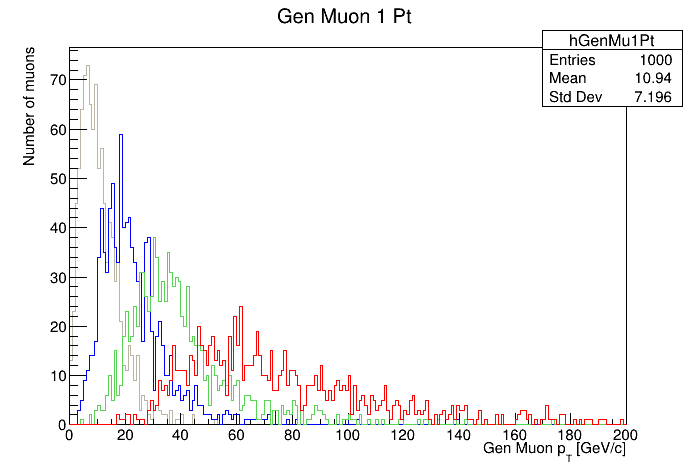

In [ ]:
c1 = TCanvas( 'c1', 'Gen Muon Pt', 200, 10, 700, 500 )
hGenMu1Pt.SetLineColor(23)
hGenMu2Pt.SetLineColor(4)
hGenMu3Pt.SetLineColor(8)
hGenMu4Pt.SetLineColor(2)
hGenMu1Pt.Draw()
hGenMu2Pt.Draw("same")
hGenMu3Pt.Draw("same")
hGenMu4Pt.Draw("same")
hGenMu1Pt.GetXaxis().SetTitle("Gen Muon p_{T} [GeV/c]");
hGenMu1Pt.GetYaxis().SetTitle("Number of muons");
c1.Draw()
#c1.SaveAs("./GenMuon1_Pt.png")



Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


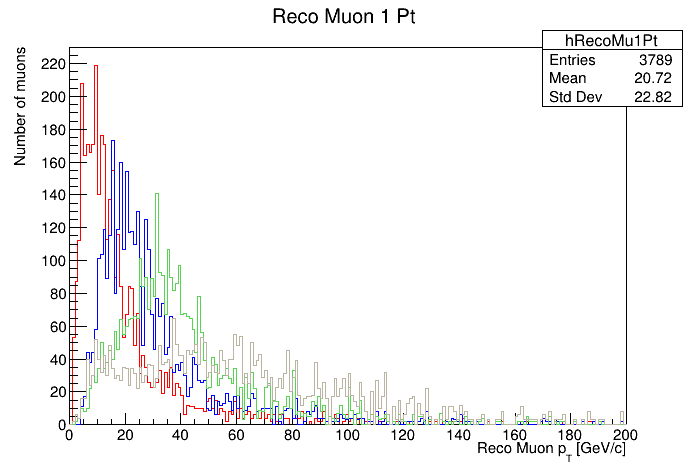

In [ ]:
c2 = TCanvas( 'c2', 'Reco Muon Pt', 200, 10, 700, 500 )
hRecoMu1Pt.SetLineColor(2)
hRecoMu2Pt.SetLineColor(4)
hRecoMu3Pt.SetLineColor(8)
hRecoMu4Pt.SetLineColor(23)
hRecoMu1Pt.Draw()
hRecoMu2Pt.Draw("same")
hRecoMu3Pt.Draw("same")
hRecoMu4Pt.Draw("same")
hRecoMu1Pt.GetXaxis().SetTitle("Reco Muon p_{T} [GeV/c]");
hRecoMu1Pt.GetYaxis().SetTitle("Number of muons");
c2.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4


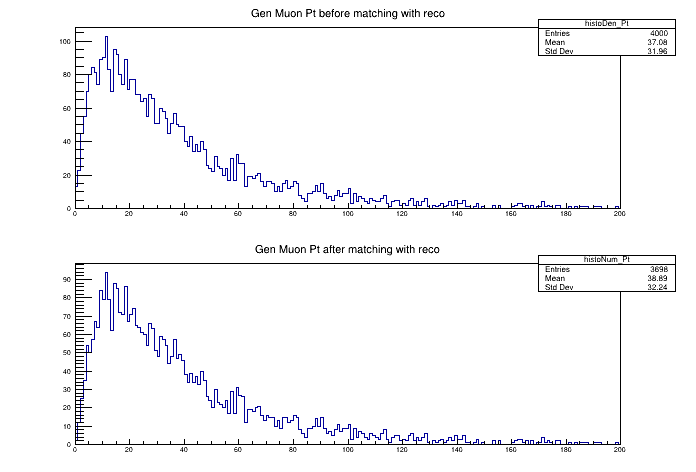

In [ ]:
c4 = TCanvas( 'c4', 'Num and Den Pt', 200, 10, 700, 500 )
c4.Divide(1,2)
c4.cd(1)
histoDen_Pt.Draw()
c4.cd(2)
histoNum_Pt.Draw()
c4.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3


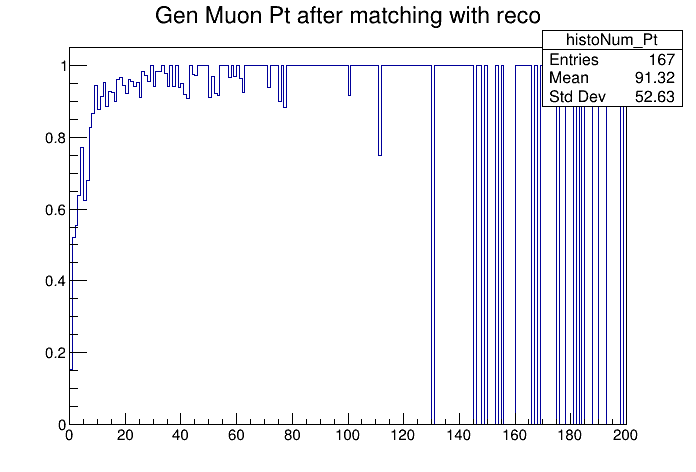

In [ ]:
c3 = TCanvas( 'c3', 'Efficiency vs Pt', 200, 10, 700, 500 )
c3.cd()
h_EffPt=histoNum_Pt.Clone();
h_EffPt.Divide(histoDen_Pt);
h_EffPt.Draw("h");
#h_EffPt.Draw("he");
c3.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5


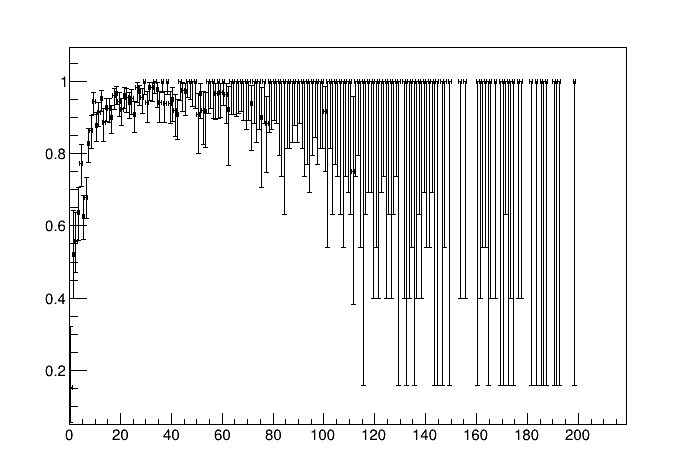

In [ ]:
c5 = TCanvas( 'c5', 'Efficiency vs Pt with TEfficiency', 200, 10, 700, 500 )
c5.cd();
#genReco_Eff_pT = TEfficiency ("eff","my efficiency;x;y;#epsilon",100,0,200,10, 0, 1)
genReco_Eff_pT = TEfficiency(histoNum_Pt,histoDen_Pt)
#genReco_Eff_pT.(histoNum_Pt,histoDen_Pt)
genReco_Eff_pT.Draw()
c5.Draw()